In [1]:
import pandas as pd
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

In [2]:
df.corr()

,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
2010 revenue,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
2011 revenue,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


In [3]:
X = df[['2010 revenue',
       'days_since_last_purchase',
       'number_of_purchases',
       'avg_order_cost'
       ]]
y = df['2011 revenue']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
model.coef_

array([  4.14982579,  -1.66976737, 394.96880445,  -0.49463827])

In [7]:
model.intercept_

538.7432547316484

In [22]:
single_customer = pd.DataFrame({
    '2010 revenue': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)

array([5197.79217043])

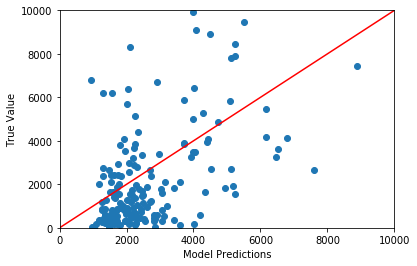

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-', color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [9]:
from scipy.stats.stats import pearsonr

pearsonr(model.predict(X_test),y_test)

(0.6984179829690799, 2.1789700999502872e-28)